In [1]:
library(ggplot2)
library(ggthemes)
library(ggrepel)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
source("../../scripts/util.R")

In [3]:
# table <- read.table(
#     'deseq2_counts_log2_tpm.txt',header=T
# )

# table %>% 
#     select(gene_name,log2FoldChange,pvalue) -> res 
# # %>% column_to_rownames('gene_name') 

In [4]:
ncu = read.table(
    'deseq2_norm.txt', sep="\t"#, col.names=TRUE
)

In [5]:
# meta 
conds  <- factor(c(
    rep('Combination',2),rep('Decitabine',2),rep('DMSO',2),rep('rg3039',2)
), levels = c('DMSO','Decitabine','rg3039','Combination'))

reps <- factor(c(
    rep(c('rep1','rep2'),4)
),c('rep1','rep2'))

colData <- data.frame(
    cond=conds,
    reps=reps,
    row.names=ncu %>% dplyr::select(-c('gene_id','gene_name')) %>% colnames,
    stringsAsFactors=FALSE
)
colData

,cond,reps
,<fct>,<fct>
hl60_combination_1,Combination,rep1
hl60_combination_2,Combination,rep2
hl60_decitabine_1,Decitabine,rep1
hl60_decitabine_2,Decitabine,rep2
hl60_dmso_1,DMSO,rep1
hl60_dmso_2,DMSO,rep2
hl60_rg3039_1,rg3039,rep1
hl60_rg3039_2,rg3039,rep2


In [6]:
# labels <- c(
#  'ADAM8',
#  'ADGRE2',
#  'ALOX5',
#  'ANXA1',
#  'BCAR1',
#  'BIN2',
#  'C5AR1',
#  'C5AR2',
#  'CCL1',
#  'CCL2',
#  'CCL20',
#  'CCL22',
#  'CCL23',
#  'CCL3',
#  'CCL3L1',
#  'CCL4',
#  'CCL5',
#  'CCR1',
#  'CCR10',
#  'CCR3',
#  'CCR4',
#  'CCRL2',
#  'CORO1A',
#  'CORO1B',
#  'CSF1',
#  'CSF1R',
#  'CSF3R',
#  'CXCL16',
#  'CXCL6',
#  'CXCL8',
#  'CXCR1',
#  'CXCR5',
#  'DAPK2',
#  'DUSP1',
#  'EGR3',
#  'FCER1G',
#  'FFAR2',
#  'FGFR1',
#  'FLT1',
#  'FPR2',
#  'GPR183',
#  'HBEGF',
#  'HRH1',
#  'HSD3B7',
#  'IL23A',
#  'ITGA1',
#  'ITGB2',
#  'JAML',
#  'LGALS3',
#  'LPAR1',
#  'MST1',
#  'NOD2',
#  'NOTCH1',
#  'NR4A1',
#  'NRP1',
#  'P2RX4',
#  'PDE4B',
#  'PTPRO',
#  'RAB13',
#  'RIN3',
#  'RIPOR2',
#  'S100A12',
#  'S100A8',
#  'S100A9',
#  'SFTPD',
#  'SLAMF8',
#  'SLIT2',
#  'THBS1',
#  'TIRAP',
#  'TNFRSF11A',
#  'ZNF580'
#     # 'ADAM8','CCL3', 'CCR2', 'CD14', 'CD86', 'HLA-E', 'IL12B',
#     # 'IL23A', 'LILRA2', 'LILRA5', 'MAPKAPK2', 'NOD2', 'ORM1',
#     # 'ORM2', 'PTAFR', 'PTPRC', 'PTPRJ', 'THBS1', 'TLR4', 'TLR9', 'TYROBP'
#     )

In [7]:
library(RColorBrewer)
library(pheatmap)

heat_colors <- brewer.pal(n = 6, name = "RdYlBu") %>% rev
paired <- brewer.pal(n = 10, name = "Paired")

In [8]:
ann_colors = list(
    cond = c('DMSO'= paired[1], 'Decitabine'=paired[3], 'rg3039'=paired[9],'Combination'=paired[10])
)

In [9]:
labels = list()

In [11]:
labels[['Neutrophil_up_regulated']] = c(
 'ZP3',
 'ISG15',
 'AL137186.2',
 'TMEM120A',
 'PIAS3',
 'TAP1',
 'PRELP',
 'LTB',
 'ZC2HC1A',
 'DGKK',
 'VENTX',
 'LINC02452',
 'PPP2R5B',
 'GPR35',
 'AC138932.3',
 'UPB1',
 'AC092944.1',
 'AC064805.2',
 'G6PD',
 'TNFSF9',
 'ABTB2',
 'EPHB3',
 'HCFC2',
 'H1-10',
 'SPSB2',
 'PROCA1',
 'FGD3',
 'IFITM2',
 'LTA',
 'MYO5A',
 'DYNLT3',
 'MYADM',
 'APCDD1',
 'CLEC4D',
 'SGMS1-AS1',
 'C15orf62',
 'BIRC7',
 'AC130371.2',
 'AL137018.1',
 'ZNF211',
 'AC073957.3',
 'PTPN22',
 'CSF2RA',
 'AC002519.1',
 'NUAK2',
 'AC068473.3',
 'DIO2',
 'ZNF876P',
 'PARP10',
 'AP000355.1',
 'FAM106A',
 'FAM227A',
 'RIC8A',
 'AL031733.2',
 'CAPN3',
 'CCR3',
 'PCDHGA5',
 'N4BP3',
 'AC023157.2',
 'GLCCI1'
)

In [12]:
geneset_name = 'Neutrophil_up_regulated'

In [114]:
mat <- ncu[
    # subset to selected genes 
    ncu$gene_name %in% labels[[geneset_name]], 
    # subset normalized counts
    c('gene_name',colData %>% arrange(cond) %>% rownames)
] %>%  remove_rownames %>% column_to_rownames('gene_name')

mat = mat %>% 
    mutate(
        hl60_combinatio_diff = abs(log10(hl60_combination_1 / hl60_combination_2)),
        hl60_dmso_diff = abs(log10(hl60_dmso_1 / hl60_dmso_2)),
        hl60_decitabine_diff = abs(log10(hl60_decitabine_1 / hl60_decitabine_2)),
        hl60_rg3039_diff = abs(log10(hl60_rg3039_1 / hl60_rg3039_2))
    ) %>% 

    arrange(hl60_combinatio_diff) %>% 
    filter(
        hl60_combinatio_diff < 0.2 #& hl60_decitabine_diff < 0.3 & hl60_rg3039_diff < 0.3
    ) %>%
    select(-c(hl60_combinatio_diff,hl60_dmso_diff,hl60_decitabine_diff,hl60_rg3039_diff))

In [115]:
mat %>% rownames

[1] "GLCCI1"     "AP000355.1" "PIAS3"      "ISG15"      "CAPN3"     
 [6] "H1-10"      "LTB"        "AC068473.3" "MYO5A"      "AC073957.3"
[11] "AC023157.2" "PTPN22"     "MYADM"      "FAM227A"    "DGKK"      
[16] "ZP3"        "G6PD"       "FGD3"       "AC138932.3" "PROCA1"    
[21] "ZC2HC1A"    "CLEC4D"     "EPHB3"      "PARP10"     "AL137186.2"
[26] "TAP1"       "SPSB2"      "AL031733.2" "UPB1"       "N4BP3"     
[31] "IFITM2"     "TMEM120A"   "TNFSF9"     "DYNLT3"     "ZNF876P"   
[36] "C15orf62"   "APCDD1"     "NUAK2"      "CCR3"       "GPR35"     
[41] "ABTB2"      "PRELP"      "SGMS1-AS1"  "BIRC7"      "VENTX"     
[46] "LTA"

png 
  2

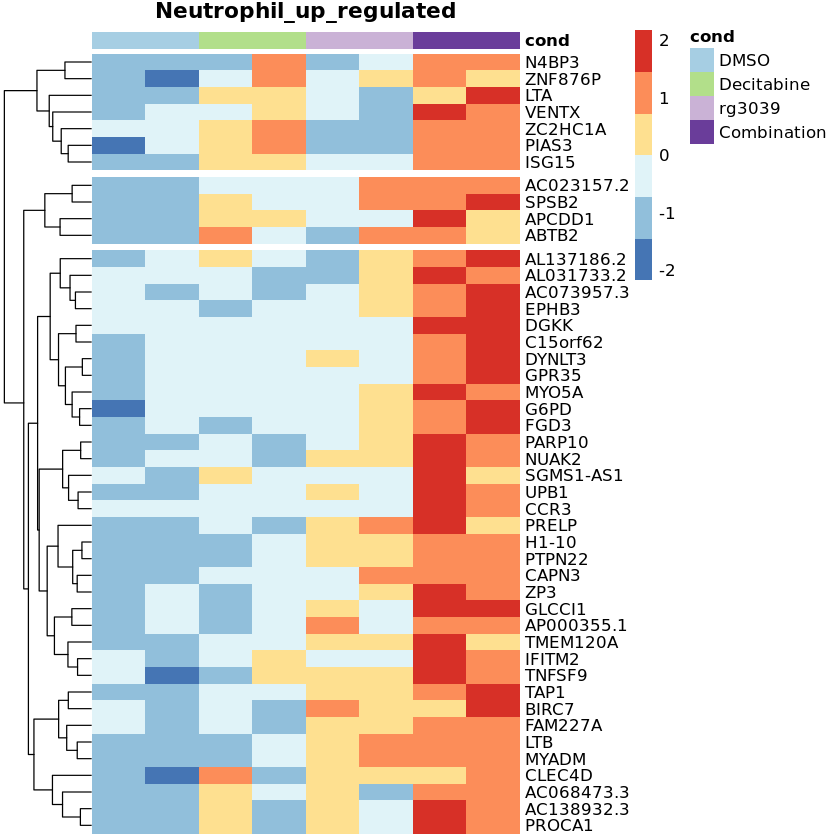

In [118]:
mat %>%
    # generate heatmap
    pheatmap(
        color = heat_colors, 
        show_colnames = F,
        show_rownames = T,
        cutree_rows = 3,
        main = geneset_name,
        annotation = colData %>% arrange(cond) %>% select(cond),
        cluster_cols = F, 
        cellheight=10,
        border_color = NA,
        scale = 'row',
        angle_col= 45,
        annotation_colors = ann_colors
) -> hm

# https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
pdf(paste0('plots/heatmap_clustering_',geneset_name,'.pdf'), width=4.5, height=6)
grid::grid.newpage()
grid::grid.draw(hm$gtable)
dev.off()

# 

In [21]:
library(ggplot2)

library(tidyverse)

In [22]:
library(patchwork)

In [23]:
res_Macrophage_vs_HL_60 = read.table(
    '../../DIFFERENTIATION/exp/res_Macrophage_vs_HL_60_delta_exp_table.txt',header = T)
res_Monocyte_vs_HL_60 = read.table(
    '../../DIFFERENTIATION/exp/res_Monocyte_vs_HL_60_delta_exp_table.txt',header = T)
res_Neutrophil_vs_HL_60 = read.table(
    '../../DIFFERENTIATION/exp/res_Neutrophil_vs_HL_60_delta_exp_table.txt',header = T)

In [24]:
res_comb_vs_dmso = read.table('exp/res_comb_vs_dmso_delta_exp_table.txt',header = T)
res_comb_vs_decitabine = read.table('exp/res_comb_vs_decitabine_delta_exp_table.txt',header = T)
res_decitabine_vs_dmso = read.table('exp/res_decitabine_vs_dmso_delta_exp_table.txt',header = T)
res_rg3039_vs_dmso = read.table('exp/res_rg3039_vs_dmso_delta_exp_table.txt',header = T)

In [25]:
df = data.frame(
    gene_name=res_comb_vs_dmso$gene_name,
    comb_vs_dmso=res_comb_vs_dmso$log2FoldChange,
    comb_vs_decitabine=res_comb_vs_decitabine$log2FoldChange,
    decitabine_vs_dmso=res_decitabine_vs_dmso$log2FoldChange,
    rg3039_vs_dmso=res_rg3039_vs_dmso$log2FoldChange,
    Macrophage_vs_HL_60=res_Macrophage_vs_HL_60$log2FoldChange,
    Monocyte_vs_HL_60=res_Monocyte_vs_HL_60$log2FoldChange,
    Neutrophil_vs_HL_60=res_Neutrophil_vs_HL_60$log2FoldChange
) %>% drop_na ()

### 

In [26]:
p1 = df %>%
    ggplot(aes(y=comb_vs_dmso, x=Macrophage_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Macrophage') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [27]:
p2 = df %>%
    ggplot(aes(y=comb_vs_dmso, x=Monocyte_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Monocyte') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [28]:
p3 = df %>%
    ggplot(aes(y=comb_vs_dmso, x=Neutrophil_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    xlim(-15,15) +
    ylim(-15,15) +
    ggtitle('Neutrophil') + 
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [29]:
p4 = df %>%
    ggplot(aes(y=decitabine_vs_dmso, x=Macrophage_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Macrophage') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [30]:
p5 = df %>%
    ggplot(aes(y=decitabine_vs_dmso, x=Monocyte_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Monocyte') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [31]:
p6 = df %>%
    ggplot(aes(y=decitabine_vs_dmso, x=Neutrophil_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Neutrophil') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [32]:
p7 = df %>%
    ggplot(aes(y=rg3039_vs_dmso, x=Macrophage_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Macrophage') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [33]:
p8 = df %>%
    ggplot(aes(y=rg3039_vs_dmso, x=Monocyte_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Monocyte') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [34]:
p9 = df %>%
    ggplot(aes(y=rg3039_vs_dmso, x=Neutrophil_vs_HL_60)) +
    geom_point(size=1,alpha=.1,color='gray10') +
    geom_smooth(method=lm) +
    ggtitle('Neutrophil') + 
    xlim(-15,15) +
    ylim(-15,15) +
    theme_classic() +
    theme(plot.title = element_text(size = 16, hjust=.5, face = "bold"))

In [38]:
ggsave("plots/differentiation_comb.pdf",
       p1 + p2 + p3,
       width = 12, height = 6, device = cairo_pdf)

ggsave("plots/differentiation_decitabine.pdf",
       p4 + p5 + p6,
       width = 12, height = 6, device = cairo_pdf)

ggsave("plots/differentiation_rg3039.pdf",
       p7 + p8 + p9,
       width = 12, height = 6, device = cairo_pdf)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warnin

### Correlation matrix

In [39]:
library(Hmisc)
library(corrplot)
library(pheatmap)
library(ggcorrplot)

In [43]:
corr <- rcorr(
    as.matrix(
        df %>% select(-c(gene_name))
    )
)

corr_df = corr$r[
    c('comb_vs_dmso','rg3039_vs_dmso','decitabine_vs_dmso'),
    c('Neutrophil_vs_HL_60','Macrophage_vs_HL_60','Monocyte_vs_HL_60')
]

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



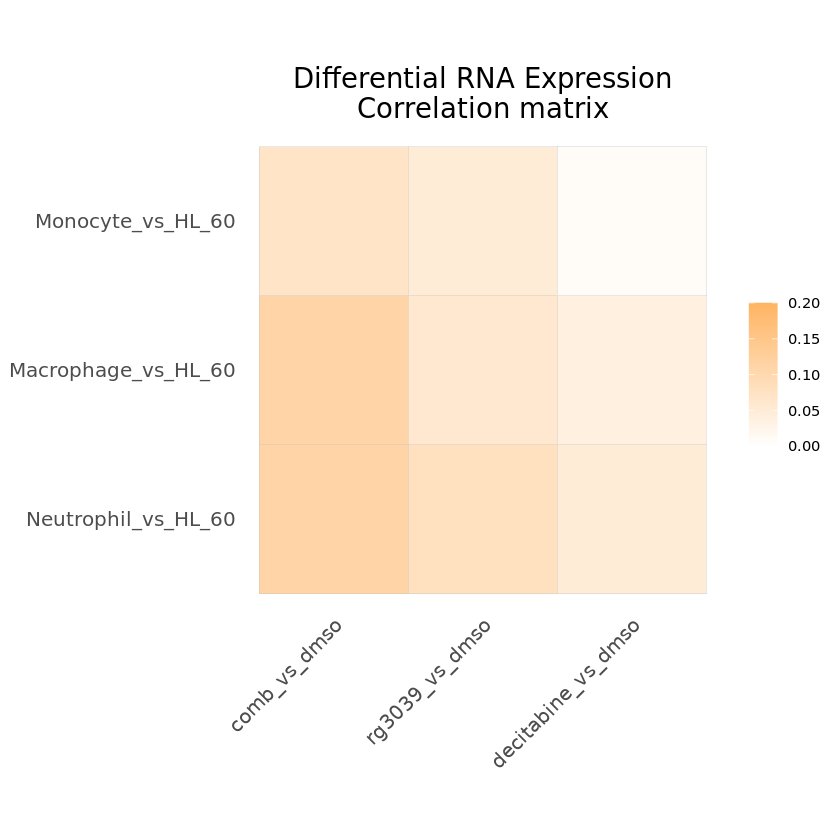

In [45]:
colors=c("#386cb0","white","#fdb462")
ggcorrplot(
    corr_df,
    method = c("square", "circle"),
    hc.order = FALSE,
    # type = "upper", 
    p.mat = corr$p,
    
) + ggtitle(
    "Differential RNA Expression\nCorrelation matrix"
) + ggplot2::scale_fill_gradient2(
    low = colors[1], high = colors[3], mid = colors[2], 
    midpoint = .0, limit = c(0, 0.2), space = "Lab"
) + theme(
    plot.title = element_text(
        # face = "bold",
        size = rel(1.5), hjust = 0.5),
    panel.background = element_blank(), 
    panel.border = element_blank(), 
    panel.grid.major = element_line(colour = "white"), 
    legend.title = element_blank(),
    # legend.position="bottom"
)

ggsave('plots/differentiation_logFC_corr.pdf',width = 4, height = 4)

# 

In [57]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12    RColorBrewer_1.1-2 forcats_0.5.1      stringr_1.4.0     
 [5] dplyr_1.0.7        purrr_0.3.4        readr_2.0.2        tidyr_1.1.4       
 [9] tibble_3.1.6       tidyverse_1.3.1    ggrepel_0.9.1      ggthemes_4.2.4    
[13] ggplot2_3.3.5     

loaded via a namespace

In [58]:
date()

[1] "Sat Mar  9 23:27:11 2024"